# Task: Reproduce results for structure learning

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
import pandas as pd

from sklearn.metrics import r2_score

Text(0.5, 1.0, '$X$ and $\\epsilon$ are uniformly distributed: $X,\\epsilon \\sim U[0,1]$')

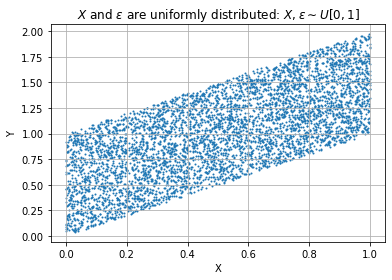

In [24]:
n = 5000
x = np.random.uniform(0, 1, size=n)
eps = np.random.uniform(0, 1, size=n)

y = x + eps
plt.scatter(x, y, s=1)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('$X$ and $\epsilon$ are uniformly distributed: $X,\epsilon \sim U[0,1]$')

Note: modified the plot text as $X$ and $Y$ have uniform distirubtions.

Regress $Y$ on $X$, calculate residuals and plot them




Text(0.5, 1.0, 'Dependence between Y_residuals and X')

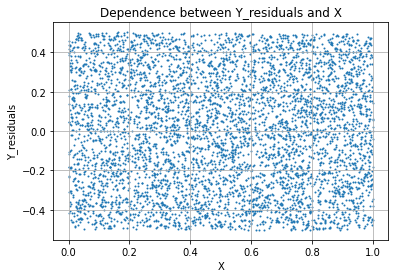

In [25]:
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1),y)
y_pred = regressor.predict(x.reshape(-1, 1))
y_residuals = y_pred - y

plt.scatter(x, y_residuals, s=1)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y_residuals')
plt.title('Dependence between Y_residuals and X')

As we can see, the relatinship between `Y_residuals` and `X` is similar in all directions, we can conclude that `Y_residuals` is independent of `X`.

**[HMD]**: Measure goodness of fit using R2-score 

In [26]:
r2_score(y,y_pred)

0.4936147162039908

**[HMD-T]**

Regress $X$ on $Y$, calculate residuals and plot them. Will we observe independence in this case? Can we say something about the causal direction?

**[HMD-Solution]**

Text(0.5, 1.0, 'Dependence between X_residuals and Y')

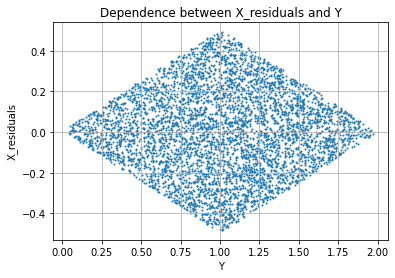

In [27]:
regressor = LinearRegression()
regressor.fit(y.reshape(-1, 1),x)
x_pred = regressor.predict(y.reshape(-1, 1))

x_residuals = x_pred - x

plt.scatter(y, x_residuals, s=1)
plt.grid(True)
plt.xlabel('Y')
plt.ylabel('X_residuals')
plt.title('Dependence between X_residuals and Y')

In [28]:
r2_score(x,x_pred)

0.4936147162039909

When egressing $X$ on $Y$, the ```X_residuals``` and ```Y``` are lso independent anymore, as again the plot follow similar pattern in all directions.



 

Since both regressions led to same uncorrelated plots, we cannot derive the causal direction yet.

**[HMD-T]**

Do the same analysis for $X$ and $\epsilon$ (`eps`) distributed according to normal distribution. Use `np.random.normal()`. Can we identify the direction of causal relationship in this case?

**[HMD-Solution]**

Text(0.5, 1.0, '$X$ and $\\epsilon$ are normally distributed: $X,\\epsilon \\sim \\mathcal{N}(0, 1)$')

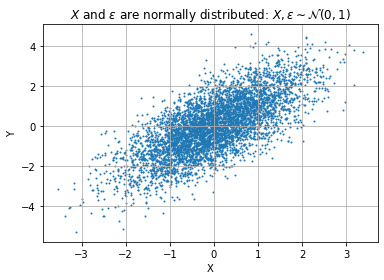

In [18]:
n = 5000
x = np.random.normal(0, 1, size=n)
eps = np.random.normal(0, 1, size=n)

y = x + eps
plt.scatter(x, y, s=1)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('$X$ and $\epsilon$ are normally distributed: $X,\epsilon \sim \mathcal{N}(0, 1)$')

Regress $Y$ on $X$

Text(0.5, 1.0, 'Dependence between Y_residuals and X')

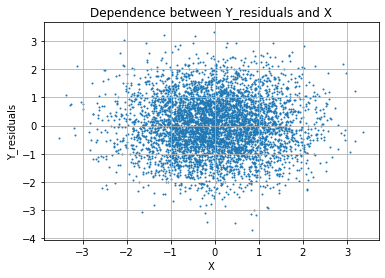

In [19]:
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1),y)
y_pred = regressor.predict(x.reshape(-1, 1))
y_residuals = y_pred - y

plt.scatter(x, y_residuals, s=1)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y_residuals')
plt.title('Dependence between Y_residuals and X')

In [20]:
r2_score(y,y_pred)

0.5129396419839025

Regress $X$ on $Y$ 

Text(0.5, 1.0, 'Dependence between X_residuals and Y')

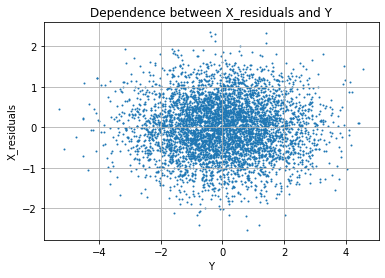

In [21]:
regressor = LinearRegression()
regressor.fit(y.reshape(-1, 1),x)
x_pred = regressor.predict(y.reshape(-1, 1))
x_residuals = x_pred - x

plt.scatter(y, x_residuals, s=1)
plt.grid(True)
plt.xlabel('Y')
plt.ylabel('X_residuals')
plt.title('Dependence between X_residuals and Y')

In [22]:
r2_score(x,x_pred)

0.5129396419839025

Again, both plots show uncorellated results. Therefore, causality direction is not clear in this case as well.

**[HMD-T]**